In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns 
import matplotlib as mpl 

In [2]:
def sqmat2vec(sqmat, upperORlower='upper'):
    """
    extracts the upper or lower triangular part of a square matrix and return as a vector

    """

    if upperORlower == 'upper':
        coords = np.where(np.triu(np.ones(sqmat.shape), k=1) > 0)
    else:
        coords = np.where(np.tril(np.ones(sqmat.shape), k=1) > 0)

    vec = sqmat[coords]
    return vec

In [3]:
np.random.seed(0) 

K1 = 30     # conditions sampled in task 1 
K2 = 30     # conditions sampled in task 2  
R = 10      # number of runs 
N = 120      # total number of conditions for both tasks 
P = 100     # number of channels

n_simulations = 1000 

In [4]:
V_e = 0.5

# G
G = np.random.randn(N, N)
G = G @ G.T 
G = (G + G.T) / 2 + np.diag(np.random.uniform(0, 1, N))
G = np.linalg.cholesky(G) 

# spatial structure 
sigma1 = 10 * np.random.randn(P, P) 
# sigma1 = sigma1 ** 2 
sigma1 = sigma1 @ sigma1.T 
sigma1 = scipy.ndimage.gaussian_filter(sigma1, 2)
sigma1 = (sigma1 + sigma1.T) / 2 
# M1 = np.real(scipy.linalg.sqrtm(sigma1))
M1 = np.linalg.cholesky(sigma1)
U1 = G @ np.random.randn(N, P) @ M1
Y1 = U1 + np.random.randn(R, N, P) * np.sqrt(V_e)

sigma2 = 10 * np.random.randn(P, P) 
# sigma2 = sigma2 ** 2 
sigma2 = sigma2 @ sigma2.T 
sigma2 = scipy.ndimage.gaussian_filter(sigma2, 2)
sigma2 = (sigma2 + sigma2.T) / 2 
# M2 = np.real(scipy.linalg.sqrtm(sigma2))
M2 = np.linalg.cholesky(sigma2) 
U2 = G @ np.random.randn(N, P) @ M2
Y2 = U2 + np.random.randn(R, N, P) * np.sqrt(V_e) 

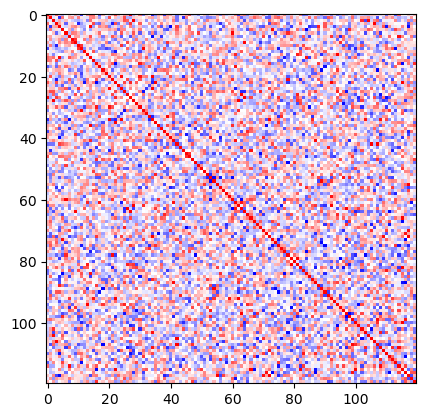

In [5]:
plt.imshow(G @ G.T, cmap='bwr', vmin=-30, vmax=30) 

In [6]:
G @ G.T 

array([[133.28445475,  13.30424853,  -5.44187781, ...,   6.68302697,
         -2.5441684 ,   7.98405021],
       [ 13.30424853, 107.09758992,  -3.04910708, ...,  -2.39255042,
         11.95384223,  -0.2294023 ],
       [ -5.44187781,  -3.04910708, 116.46663563, ...,  14.01210505,
        -12.43682784,  11.51521137],
       ...,
       [  6.68302697,  -2.39255042,  14.01210505, ..., 141.89848528,
        -21.27190812,   8.4672936 ],
       [ -2.5441684 ,  11.95384223, -12.43682784, ..., -21.27190812,
         91.16119284, -12.09750531],
       [  7.98405021,  -0.2294023 ,  11.51521137, ...,   8.4672936 ,
        -12.09750531,  87.99408332]])

In [7]:
np.linalg.eigvals(G) 

array([ 1.89379994,  2.19119797,  3.77867821,  3.065478  ,  3.01805011,
        3.20985262,  3.0134508 ,  3.08781413,  3.58034665,  4.01837006,
        2.91162211,  3.03473012,  4.76532498,  3.84450395,  2.93289765,
        4.01540801,  5.17480896,  4.27782748,  5.34625389,  4.79443434,
        4.71120993,  4.56122026,  5.98817868,  5.53373246,  4.61762   ,
        5.42809   ,  5.25382623,  5.26117952,  6.42345619,  4.89122392,
        5.38707253,  6.70966143,  7.05196026,  5.07540276,  5.01331652,
        7.01958532,  5.06694714,  7.34125953,  6.29500204,  6.56731992,
        6.76298369,  5.53242396,  6.71847607,  6.55068856,  6.64689146,
        5.91635663,  6.58915583,  6.23013461,  6.1079506 ,  7.21014151,
        6.23660255,  6.7416918 ,  7.27566272,  6.28363184,  6.8152787 ,
        7.41569169,  6.84300882,  7.93440321,  8.18578075,  8.07538073,
        6.90704884,  7.79351206,  6.55106078,  8.25002678,  8.78738855,
        9.20085464,  8.79364669,  9.29339895,  9.2563911 ,  8.13

In [8]:
## corrs of simmat on the original time series 
# topo1 = sqmat2vec(np.corrcoef(Y1.T))
# topo2 = sqmat2vec(np.corrcoef(Y2.T))
topo1 = sqmat2vec(np.corrcoef((U1 - U1.mean(axis=0, keepdims=True)).T))
topo2 = sqmat2vec(np.corrcoef((U2 - U2.mean(axis=0, keepdims=True)).T))

corr_original_time_series = np.corrcoef([topo1, topo2])[0, 1]
corr_original_time_series 

0.16735936835748638

In [9]:
corrs_same = []
corrs_diff = []

for simI in np.arange(n_simulations):
    corrs_same_this = []
    corrs_diff_this = []

    G = np.random.randn(N, N)
    G = G @ G.T 
    G = (G + G.T) / 2 + np.diag(np.random.uniform(0, 1, N))
    G = np.linalg.cholesky(G)

    U1 = G @ np.random.randn(N, P) @ M1
    Y1 = U1 + np.random.randn(R, N, P) * np.sqrt(V_e)

    U2 = G @ np.random.randn(N, P) @ M2
    Y2 = U2 + np.random.randn(R, N, P) * np.sqrt(V_e) 

    for i in np.arange(R-1):
        for j in np.arange(i+1, R):
            # diff 
            y1 = Y1[i, 0:K1]
            topo1 = sqmat2vec(np.corrcoef((y1 - y1.mean(axis=0, keepdims=True)).T))
            y2 = Y2[j, N-K2:N]
            topo2 = sqmat2vec(np.corrcoef((y2 - y2.mean(axis=0, keepdims=True)).T))
            corrs_diff_this.append(np.corrcoef([topo1, topo2])[0, 1]) 

            # same
            y1 = Y1[i, 0:K1]
            topo1 = sqmat2vec(np.corrcoef((y1 - y1.mean(axis=0, keepdims=True)).T))
            y2 = Y2[j, 0:K1]
            topo2 = sqmat2vec(np.corrcoef((y2 - y2.mean(axis=0, keepdims=True)).T))
            corrs_same_this.append(np.corrcoef([topo1, topo2])[0, 1])

    corrs_same.append(np.mean(corrs_same_this))
    corrs_diff.append(np.mean(corrs_diff_this))

In [10]:
results = {'same': corrs_same,
           'diff': corrs_diff}

<Axes: >

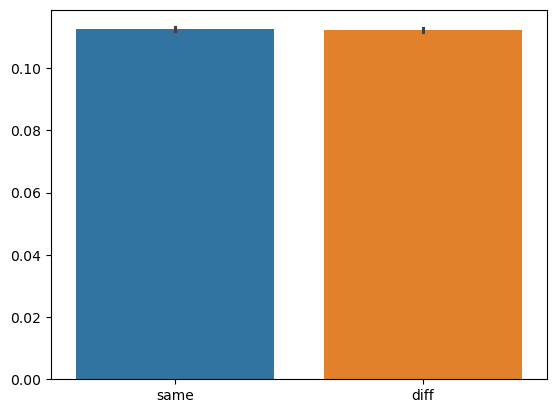

In [11]:
sns.barplot(results, errorbar='se')

In [12]:
scipy.stats.ttest_ind(corrs_same, corrs_diff, nan_policy='omit')  

TtestResult(statistic=0.15742437039151475, pvalue=0.8749263147822763, df=1998.0)

Imagine you have 2 tasks and there are actually a total of N common task conditions that define these tasks. We try to understand whether the topography change across tasks is purely due to the fact that we sampled different conditions in each experiment or there are actual changes across tasks. 

The null hypothesis is that the topographies defined by non-overlapping conditions are indistinguishable. Under the null hypothesis, the similarity of task 1 topography (condition set A) and task 2 topography (condition set A) is the same as the similarity of task 1 topography (condition set A) and task 2 topography (condition set B). Note, condition set A is the set of conditions we sampled in task 1, and condition set B is the set of conditions we sampled in task 2, assuming the worst case, i.e., when there is no overlap. 

T-test results suggest that under the null hypothesis, these similarities are indeed indistinguishable. We cannot reject the null hypothesis. Therefore, the change in topography cross tasks cannot be attributed to the differences in sampled conditions. 